In [3]:
from music21 import *
# Duration and Pitch Objects are
# not music21 objects

In [1]:
p = pitch.Pitch("A-2")
s = stream.Stream()
s.insert(0, p)
# So Stream object is music21 Object
# but pitch and duration are not 
# it gives error

NameError: name 'pitch' is not defined

In [7]:
n = note.Note('A-2', type='half')
s = stream.Stream()
s.insert(0, n)
s.show('text')
print(isinstance(n, base.Music21Object))
print(isinstance(note.Note, base.Music21Object))



{0.0} <music21.note.Note A->
True
False


In [18]:
print('Music21Object' in n.classes)
print('Music21Object' in pitch.Pitch.classes)
print('Chord' in n.classes)
print('Note' in n.classes)
print(note.Rest().classes)
print(note.Note().classes)




True
False
False
True
('Rest', 'GeneralNote', 'Music21Object', 'object')
('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'object')


<music21.note.Note A>
<music21.note.Note B>


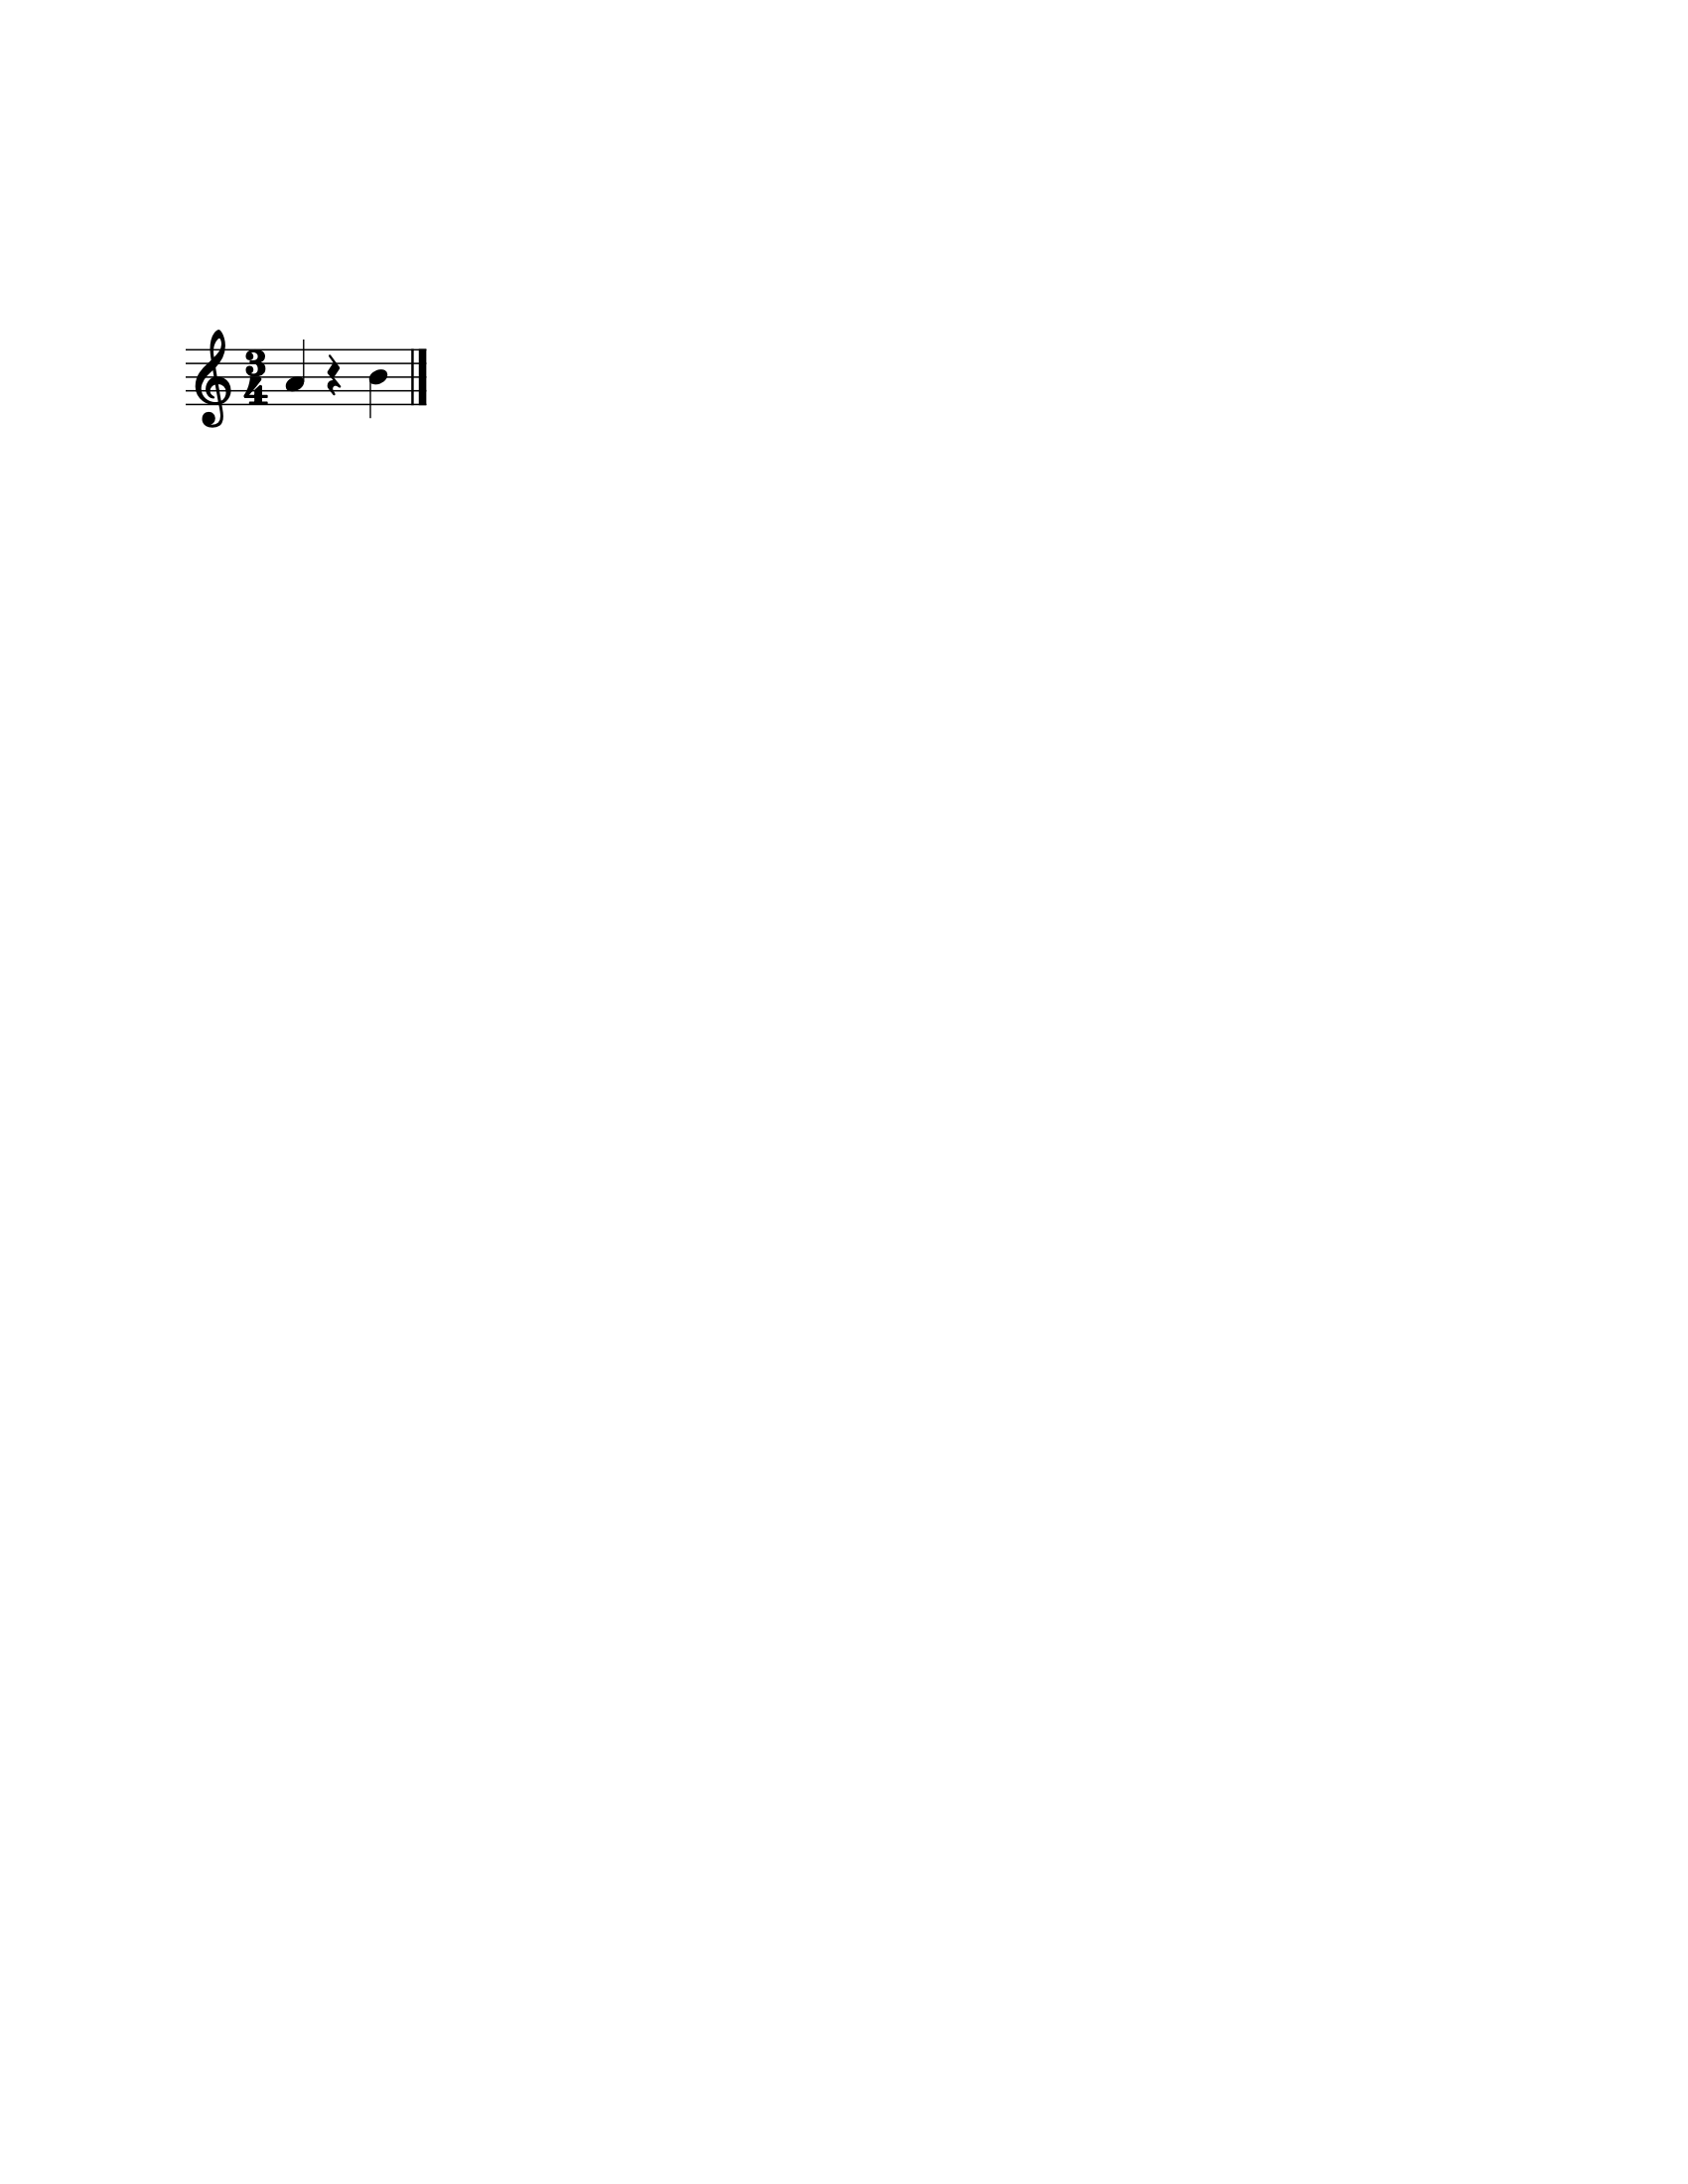

In [16]:
s = stream.Stream()
s.append(clef.TrebleClef())
s.append(meter.TimeSignature('3/4'))
s.append(note.Note("A"))
s.append(note.Rest())
s.append(note.Note("B"))

for element in s.getElementsByClass('Note'):
    print(element)
s.show()

In [19]:
for element in s.getElementsByClass('GeneralNote'):
    print(element)

<music21.note.Note A>
<music21.note.Rest rest>
<music21.note.Note B>


In [22]:
r = note.Rest()
print(r.classSet)
n = note.Note("C#4")
n.id

frozenset({'GeneralNote', 'object', 'music21.note.Rest', <class 'music21.note.GeneralNote'>, 'builtins.object', 'Rest', <class 'music21.note.Rest'>, 'music21.note.GeneralNote', 'music21.base.Music21Object', <class 'object'>, <class 'music21.base.Music21Object'>, 'Music21Object'})


4613217376

In [23]:
n.id = 'first_note'
n.id

'first_note'

In [24]:
s = stream.Stream()
s.id = 'empty_stream'
s

<music21.stream.Stream empty_stream>

In [27]:
bach = corpus.parse('bwv66.6')
sopr = bach.parts['soprano']
print(sopr)
sopr.id


<music21.stream.Part Soprano>


'Soprano'

In [28]:
s.append(n)
x = s.getElementById('first_note')
print(x, x.id)

<music21.note.Note C#> first_note


In [29]:
n.groups


[]

In [30]:
n.groups.append('black_key')
n.groups.append('sharped')
n.groups

['black_key', 'sharped']

In [31]:
for x in s.getElementsByGroup('sharped'):
    print(x, x.id)

<music21.note.Note C#> first_note


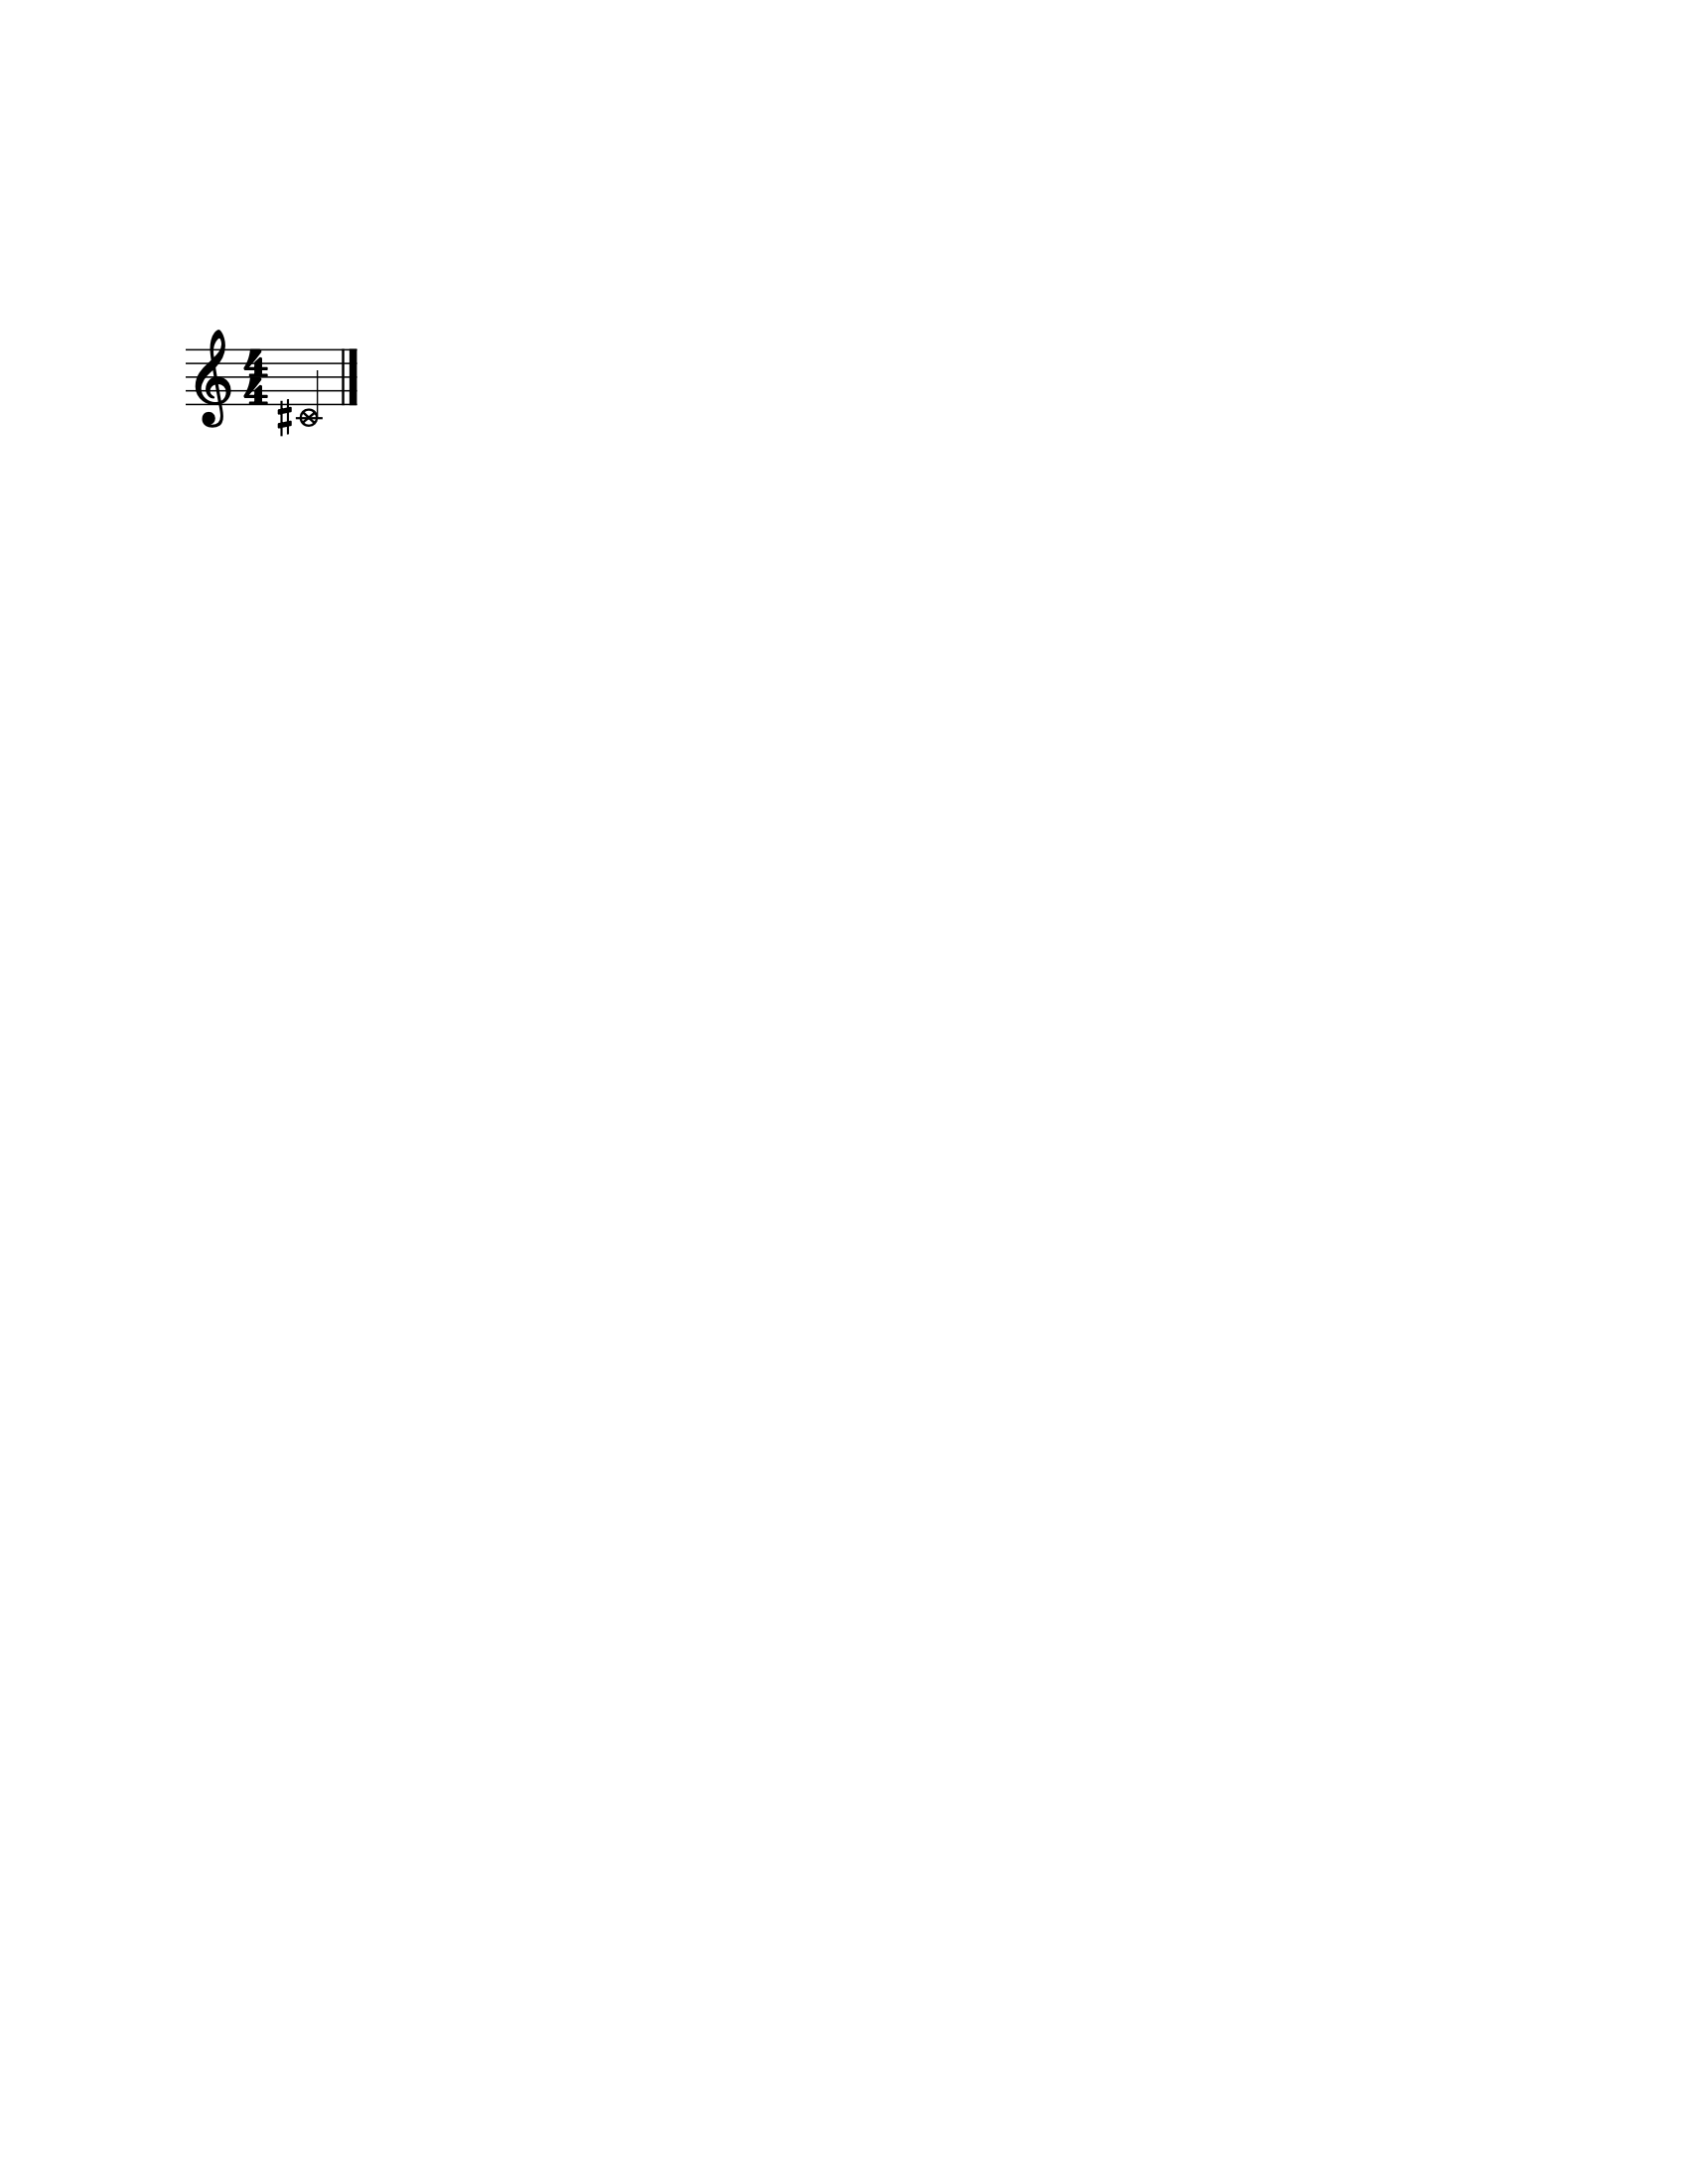

In [32]:
for x in s.getElementsByGroup('black_key'):
    x.notehead = 'circle-x'

s.show()

In [33]:
n.activeSite


In [34]:
t = stream.Stream()
t.id = 'new_stream'
t.insert(4.0, n)

n.activeSite

<music21.stream.Stream new_stream>

In [35]:
n.activeSite = s
n.activeSite

<music21.stream.Stream empty_stream>

In [36]:
m = note.Rest()
m.activeSite is None

True

In [37]:
n.activeSite = s
print(n.offset)
n.activeSite = t
print(n.offset)

0.0
4.0


In [38]:
n2 = note.Note('G-2')
n2.offset = 20.0
s.insert(n2)
n2.activeSite
n2.offset

20.0

{0.0} <music21.note.Note D>
{0.0} <music21.note.Note E>


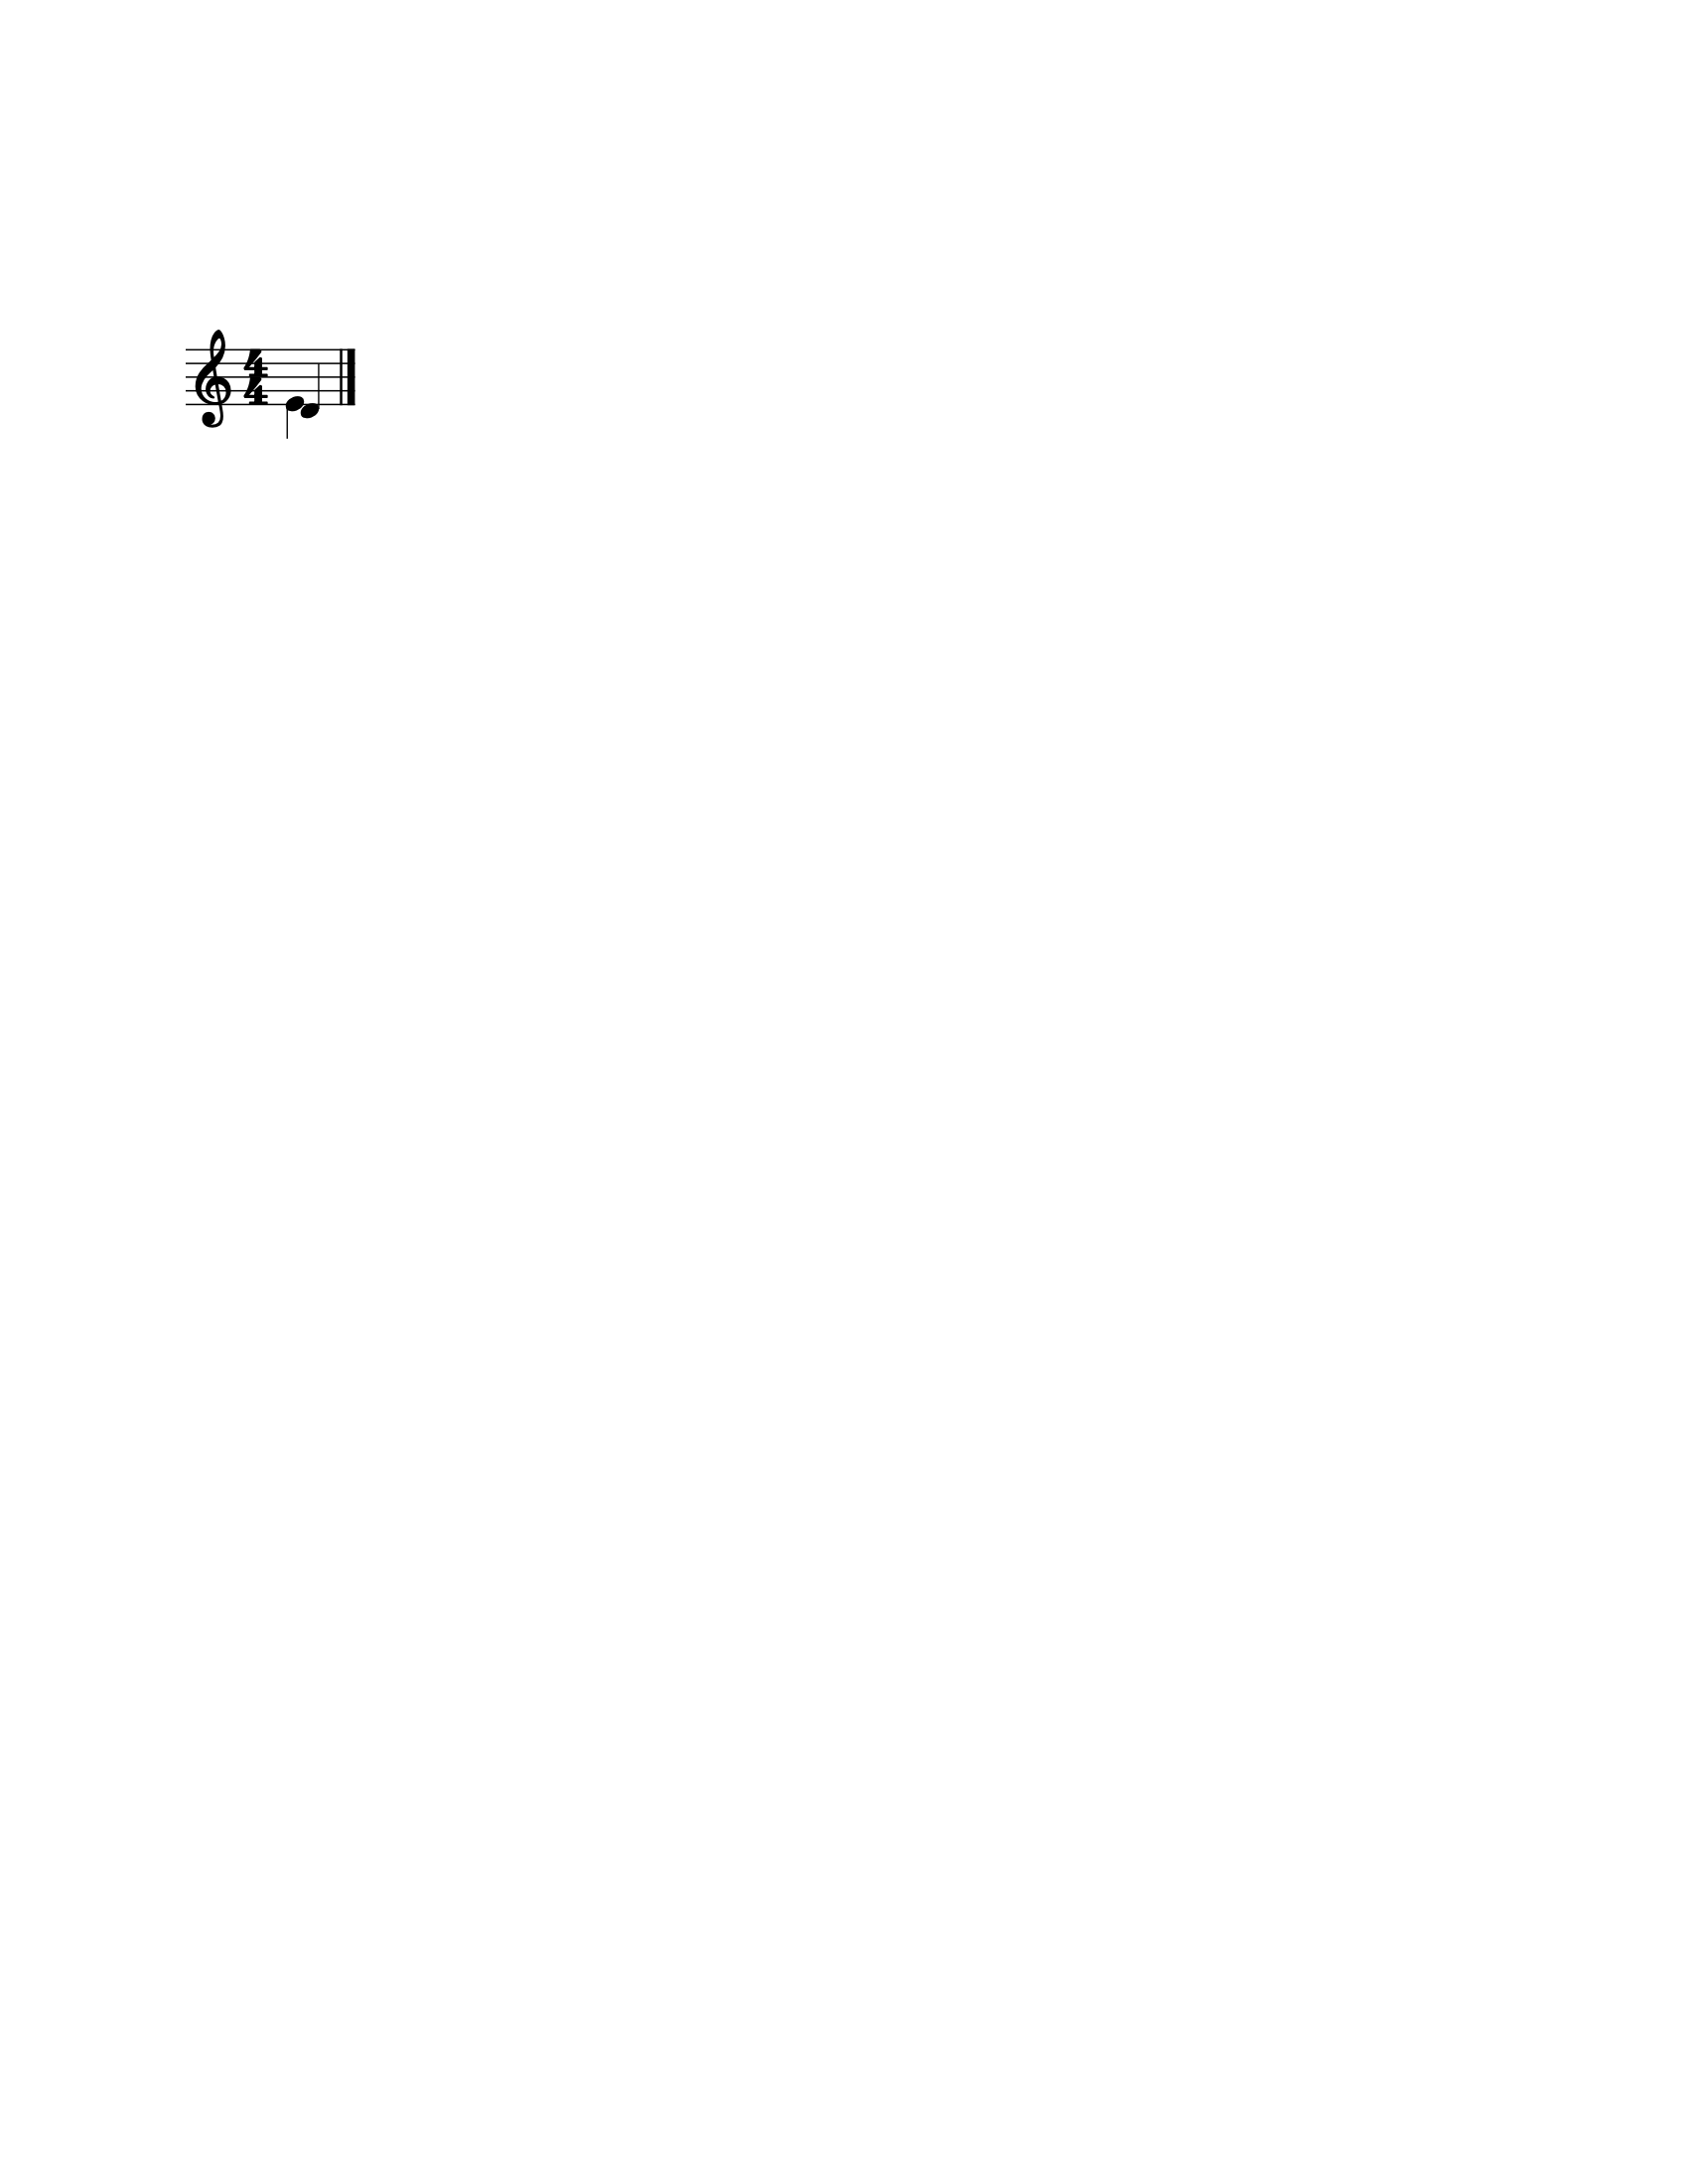

In [48]:
s = stream.Stream()
d = note.Note('D4')
e = note.Note('E4')
s.insert(0.0, d)
s.insert(0.0, e)
s.show('text')
s.show()

{0.0} <music21.note.Note D>
{0.0} <music21.note.Note E>


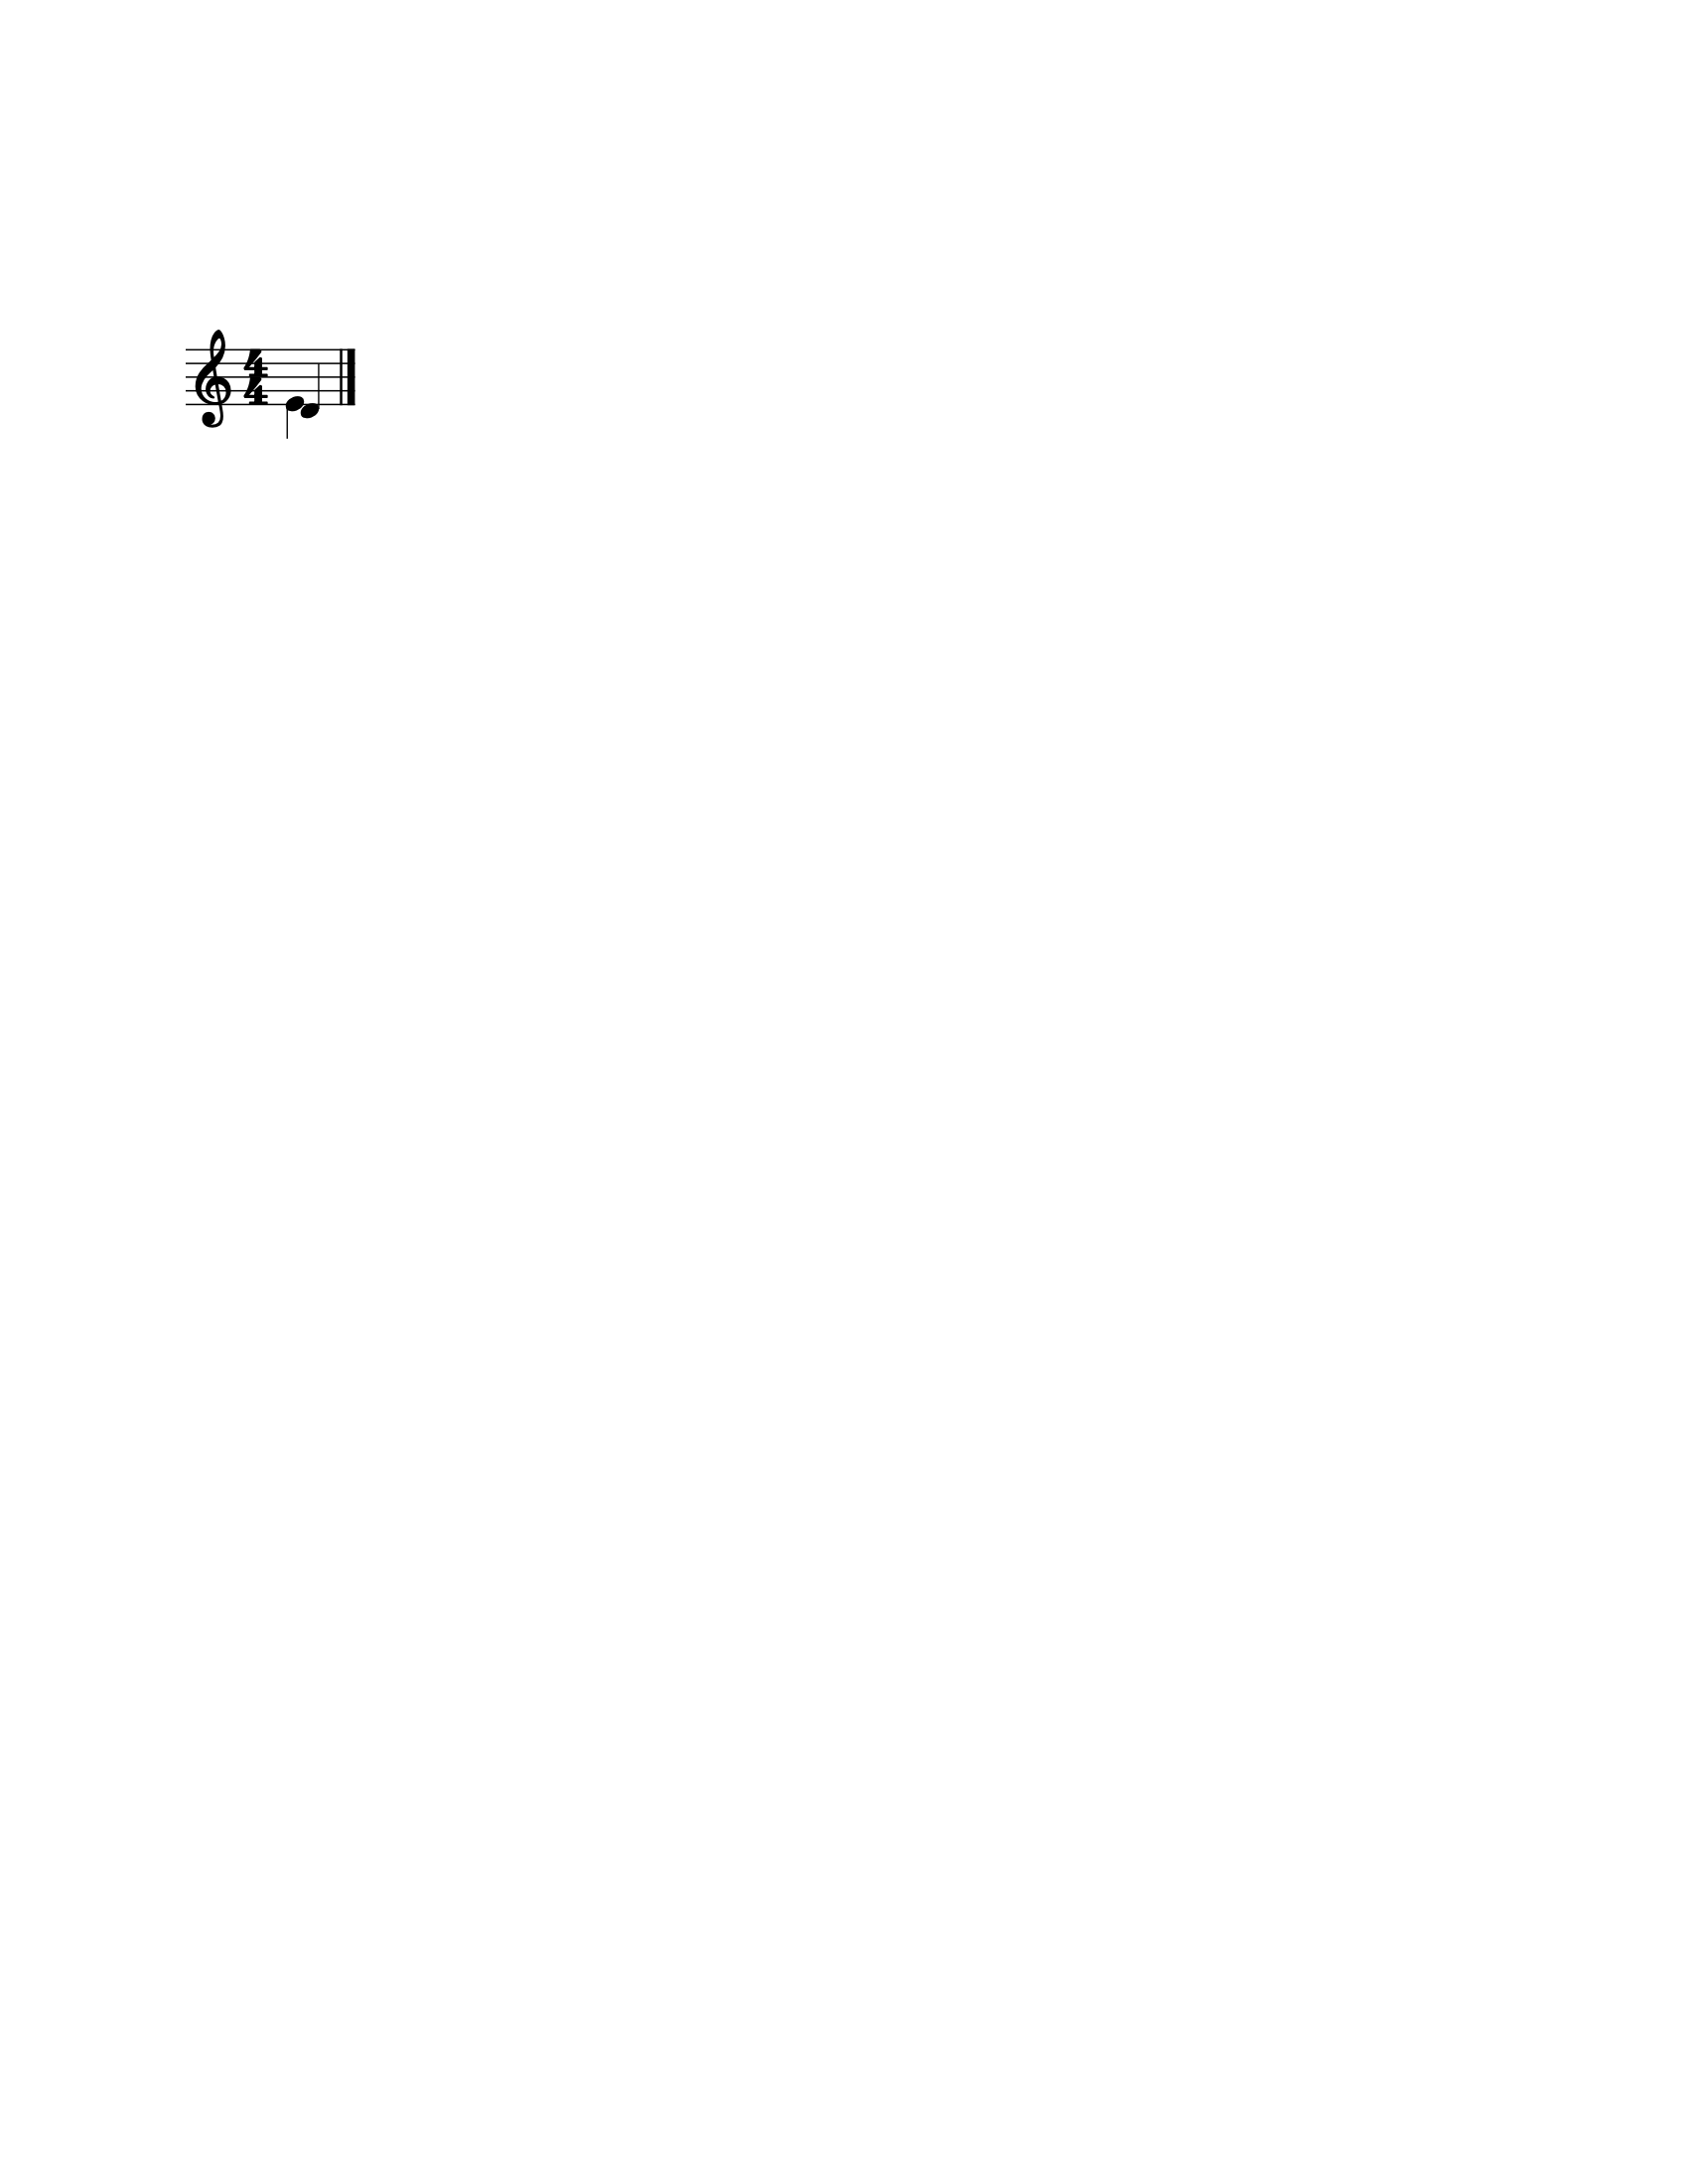

In [54]:
e.priority = 1
d.priority = 0
s.show('text')
s.show()

In [55]:
tc = clef.TrebleClef()
s.insert(0.0, tc)
s.show('text')

{0.0} <music21.clef.TrebleClef>
{0.0} <music21.note.Note D>
{0.0} <music21.note.Note E>


In [56]:
(tc.priority, d.priority, e.priority)

(0, 0, 1)

In [45]:
(tc.classSortOrder, d.classSortOrder, e.classSortOrder)
# Objects seem to be sorted by offset first, then priority, then when they were inserted. But what about this:
# Also classSortOrder


(0, 20, 20)

In [46]:
(clef.TrebleClef.classSortOrder, note.Note.classSortOrder)

(0, 20)

In [47]:
clef.TrebleClef.classSortOrder = 0
note.Note.classSortOrder = 20
(tc.classSortOrder, d.classSortOrder, e.classSortOrder)

(0, 20, 20)